In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from representer.representer_model import RepresenterModel

In [4]:
mnist_dataset = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

categorical_train_labels = tf.keras.utils.to_categorical(train_labels)
categorical_test_labels = tf.keras.utils.to_categorical(test_labels)

tf.keras.backend.set_floatx("float64")

In [5]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(10, use_bias=False, kernel_regularizer="l2"),
    ]
)

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [6]:
model.fit(train_images, categorical_train_labels, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 1s 865us/step - loss: 0.7939 - accuracy: 0.8562 - val_loss: 0.6267 - val_accuracy: 0.9070
Epoch 2/10
1688/1688 [==============================] - 1s 740us/step - loss: 0.6967 - accuracy: 0.8831 - val_loss: 0.6233 - val_accuracy: 0.9093
Epoch 3/10
1688/1688 [==============================] - 1s 756us/step - loss: 0.6971 - accuracy: 0.8832 - val_loss: 0.6245 - val_accuracy: 0.9113
Epoch 4/10
1688/1688 [==============================] - 1s 747us/step - loss: 0.6969 - accuracy: 0.8841 - val_loss: 0.6257 - val_accuracy: 0.9088
Epoch 5/10
1688/1688 [==============================] - 1s 793us/step - loss: 0.6972 - accuracy: 0.8841 - val_loss: 0.6283 - val_accuracy: 0.9087
Epoch 6/10
1688/1688 [==============================] - 1s 794us/step - loss: 0.6968 - accuracy: 0.8838 - val_loss: 0.6277 - val_accuracy: 0.9068
Epoch 7/10
1688/1688 [==============================] - 1s 793us/step - loss: 0.6974 - accuracy: 0.8832 - val_loss: 0.6221 -

In [7]:
feature_model = model.get_layer(index=0)
prediction_network = model.get_layer(index=1)

In [8]:
representer_model = RepresenterModel(
    feature_model,
    prediction_network,
    train_images[:54000],
    categorical_train_labels[:54000],
    test_images,
    model.loss,
    num_training_points=54000
)

In [9]:
num_training_points = 54000
num_test_points = 10

representer_vals = np.zeros((num_training_points, num_test_points))

for i in range(num_training_points):
    for j in range(num_test_points):
        representer_vals[i, j] = representer_model.get_representer_value(i, j)[0, test_labels[j]].numpy()
    if (i % 1000) == 999:
        print("{} training points processed.".format(i+1))

1000 training points processed.
2000 training points processed.
3000 training points processed.
4000 training points processed.
5000 training points processed.
6000 training points processed.
7000 training points processed.
8000 training points processed.
9000 training points processed.
10000 training points processed.
11000 training points processed.
12000 training points processed.
13000 training points processed.
14000 training points processed.
15000 training points processed.
16000 training points processed.
17000 training points processed.
18000 training points processed.
19000 training points processed.
20000 training points processed.
21000 training points processed.
22000 training points processed.
23000 training points processed.
24000 training points processed.
25000 training points processed.
26000 training points processed.
27000 training points processed.
28000 training points processed.
29000 training points processed.
30000 training points processed.
31000 training poin

In [10]:
neg_idxs = np.argsort(representer_vals, axis=0)
pos_idxs = np.flip(np.argsort(representer_vals, axis=0), axis=0)

In [17]:
num_test_points_to_show = 8
num_most_influential_to_show = 3

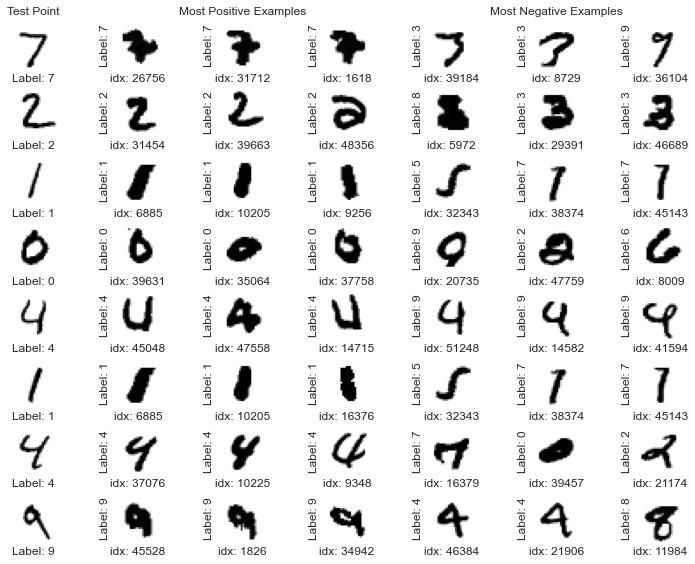

In [18]:
fig, ax = plt.subplots(
    num_test_points_to_show,
    2*num_most_influential_to_show+1,
    subplot_kw={'xticks':[], 'yticks':[]},
    figsize=(12.8, 9.6)
)
fig.subplots_adjust(hspace=0.4)

ax[0, 0].set_title("Test Point")
ax[0, (num_most_influential_to_show+1)//2].set_title("Most Positive Examples")
ax[0, (3*num_most_influential_to_show+1)//2].set_title("Most Negative Examples")

for i in range(num_test_points_to_show):
    ax[i, 0].imshow(test_images[i], cmap=plt.cm.binary)
    ax[i, 0].set_xlabel("Label: {}".format(test_labels[i]))
    for j in range(num_most_influential_to_show):
        ax[i, j+1].imshow(train_images[pos_idxs[j, i]], cmap=plt.cm.binary)
        ax[i, j+1].set_xlabel("idx: {}".format(pos_idxs[j, i]))
        ax[i, j+1].set_ylabel("Label: {}".format(train_labels[pos_idxs[j, i]]))
        ax[i, num_most_influential_to_show+j+1].imshow(train_images[neg_idxs[j, i]], cmap=plt.cm.binary)
        ax[i, num_most_influential_to_show+j+1].set_xlabel("idx: {}".format(neg_idxs[j, i]))
        ax[i, num_most_influential_to_show+j+1].set_ylabel("Label: {}".format(train_labels[neg_idxs[j, i]]))